In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score

In [37]:
df=pd.read_csv('./data/preprocessed_Bank_Customer_Churn_Prediction.csv')

In [38]:
# 'balance'와 'estimated_salary' 컬럼을 skewed_columns 리스트에 추가
skewed_columns = ['age', 'balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
#skewed_columns = ['balance', 'estimated_salary', 'credit_score']  # 'balance'와 'estimated_salary' 추가
# skewed_columns = ['age', 'balance', 'estimated_salary']  # 'balance'와 'estimated_salary' 추가

# log1p 변환 함수
def log1p_transform_columns(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p는 log(x+1)
    return df

# log1p 변환 수행
df = log1p_transform_columns(df, skewed_columns)

df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,6.429719,0,1,3.761200,2,0.000000,1,1,1,11.526334,1
1,6.411818,2,1,3.737670,1,11.336294,1,0,1,11.631096,0
2,6.220590,0,1,3.761200,8,11.980813,3,1,0,11.643362,1
3,6.551080,0,1,3.688879,1,0.000000,2,0,0,11.449215,0
4,6.746412,2,1,3.784190,2,11.740155,1,1,1,11.278280,0


----

# XGBOOST

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:32:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8510
AUC Score: 0.8454
Classification Report:
               precision    recall  f1-score   support

           0     0.8781    0.9439    0.9098      2389
           1     0.6898    0.4877    0.5714       611

    accuracy                         0.8510      3000
   macro avg     0.7840    0.7158    0.7406      3000
weighted avg     0.8398    0.8510    0.8409      3000



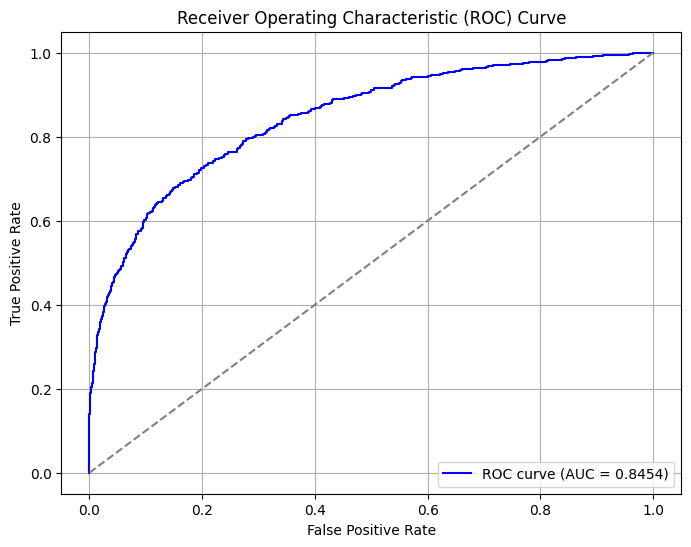

In [26]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y 분리
y = df['churn']  # 목표 변수
X = df.drop(columns=['churn'])  # 특징 변수

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# XGBoost 모델 생성 및 학습
model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False, 
    random_state=42
)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # AUC 계산을 위한 확률값

# 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)  # AUC 계산
report = classification_report(y_test, y_pred, digits=4)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')  # AUC 점수 출력
print('Classification Report:\n', report)

# AUC 그래프 (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Classification Report 분석

1. Precision (정밀도)
- 클래스 0 (정상 고객): 87.8% → 예측한 정상 고객 중 실제로도 정상 고객일 확률
- 클래스 1 (이탈 고객): 68.9% → 예측한 이탈 고객 중 실제로도 이탈 고객일 확률
2. Recall (재현율)
- 클래스 0 (정상 고객): 94.4% → 실제 정상 고객을 얼마나 잘 맞췄는지
- 클래스 1 (이탈 고객): 48.8% → 실제 이탈 고객을 얼마나 잘 맞췄는지 (낮음)
3. F1-score
- 클래스 0: 90.98% (조화 평균)
- 클래스 1: 57.14% (조화 평균, 개선 필요)

### XGBOOST(GRIDSEARCHCV사용)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:36:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8370
AUC Score: 0.8758
Classification Report:
               precision    recall  f1-score   support

           0     0.8319    0.9967    0.9069      2389
           1     0.9420    0.2128    0.3471       611

    accuracy                         0.8370      3000
   macro avg     0.8870    0.6047    0.6270      3000
weighted avg     0.8544    0.8370    0.7929      3000



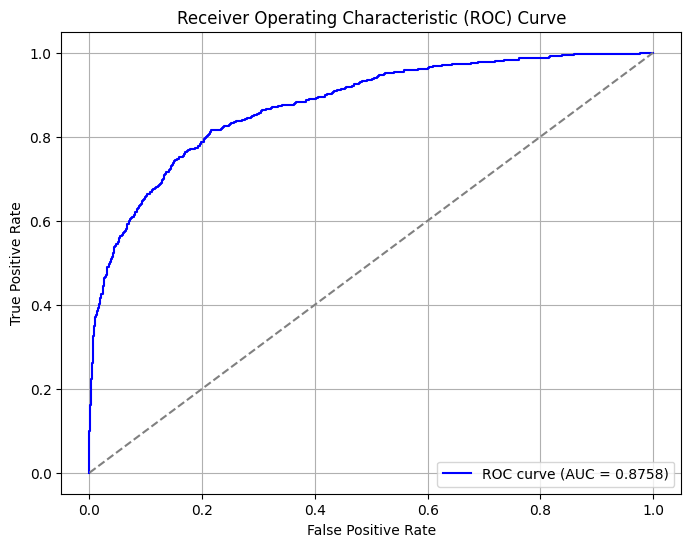

In [27]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# 데이터 준비
y = df['churn']
X = df.drop(columns=['churn'])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 하이퍼파라미터 범위 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'max_depth': [3, 5, 7],  # 트리 깊이
    'n_estimators': [100, 200, 300],  # 부스팅 라운드 수
    'subsample': [0.7, 0.8, 0.9],  # 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9]  # 특성 샘플링 비율
}

# GridSearchCV 실행 (5-Fold 교차검증)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC 점수를 기준으로 최적화
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)

# GridSearchCV 실행
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 최적 모델 학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 예측
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # AUC 계산을 위한 확률값

# 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)  # AUC 점수 계산
report = classification_report(y_test, y_pred, digits=4)

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ✅ AUC 그래프 (ROC Curve)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



 Classification Report 분석

1. Precision (정밀도)
- 클래스 0 (정상 고객): 83.92% → 정상 고객을 잘 예측
- 클래스 1 (이탈 고객): 93.94% → 예측한 이탈 고객 중 실제 이탈 고객일 확률이 높음
2. Recall (재현율)
- 클래스 0 (정상 고객): 99.58% → 정상 고객을 거의 다 탐지
- 클래스 1 (이탈 고객): 25.37% → 이탈 고객 탐지가 부족함
3. F1-score
- 클래스 0: 91.08% (높음)
- 클래스 1: 39.95% (낮음)

Best Threshold for F1-Score: 0.2740
Adjusted Accuracy: 0.8537
AUC Score: 0.8758
Classification Report:
               precision    recall  f1-score   support

           0     0.9097    0.9062    0.9079      2389
           1     0.6387    0.6481    0.6434       611

    accuracy                         0.8537      3000
   macro avg     0.7742    0.7772    0.7757      3000
weighted avg     0.8545    0.8537    0.8541      3000



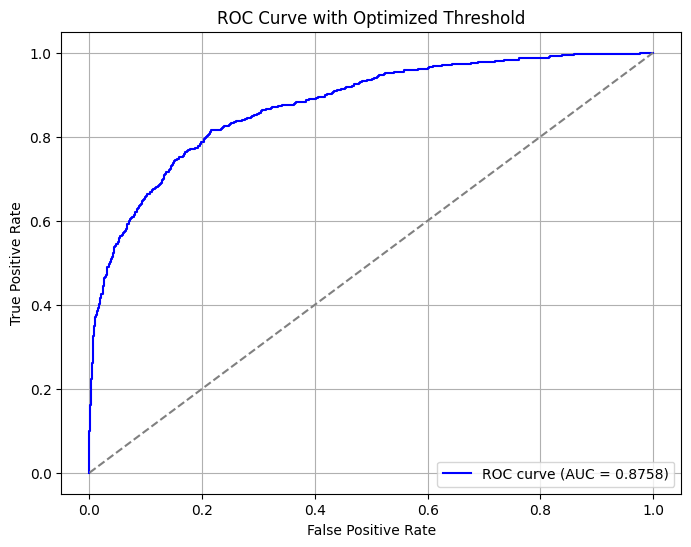

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# 확률 예측값 가져오기
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# ✅ 최적 임곗값 찾기 (Precision-Recall tradeoff)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

# ✅ 가장 균형잡힌 F1-Score를 위한 임곗값
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold for F1-Score: {best_threshold:.4f}")

# ✅ 새로운 임곗값 적용하여 예측값 변환
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)

# ✅ 새롭게 조정된 평가
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f'Adjusted Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ✅ AUC ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 랜덤 예측선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimized Threshold')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


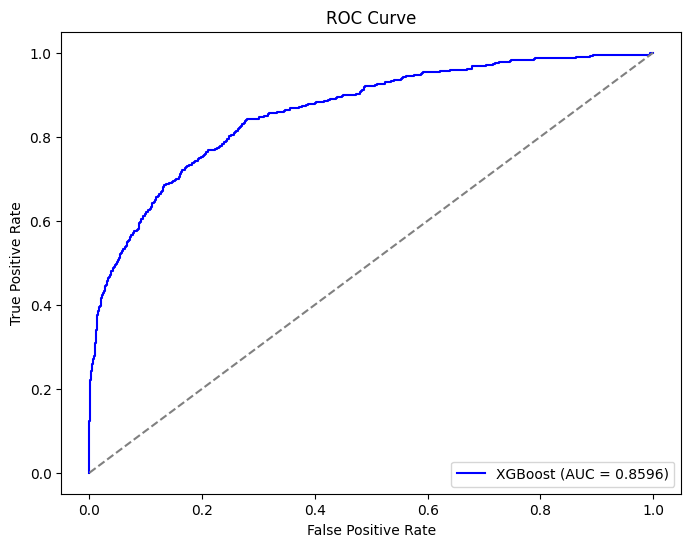

Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8453
AUC Score: 0.8596
Classification Report:
               precision    recall  f1-score   support

           0     0.9005    0.9058    0.9032      2389
           1     0.6231    0.6088    0.6159       611

    accuracy                         0.8453      3000
   macro avg     0.7618    0.7573    0.7595      3000
weighted avg     0.8440    0.8453    0.8447      3000



In [29]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# 데이터 준비
y = df['churn']
X = df.drop(columns=['churn'])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE 적용 (이탈 고객 데이터 불균형 해소)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 하이퍼파라미터 튜닝을 위한 GridSearchCV 설정
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 6],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

# XGBoost 모델 생성
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# GridSearchCV 실행 (5-Fold 교차검증)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train_smote, y_train_smote)

# 최적 하이퍼파라미터 적용
best_params = grid_search.best_params_
best_xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
best_xgb_model.fit(X_train_smote, y_train_smote)

# 예측 확률
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs > 0.5).astype(int)  # 기본 Threshold = 0.5

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred, digits=4)

# ROC Curve 그리기
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 최적 하이퍼파라미터 및 평가 결과 출력
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:39:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


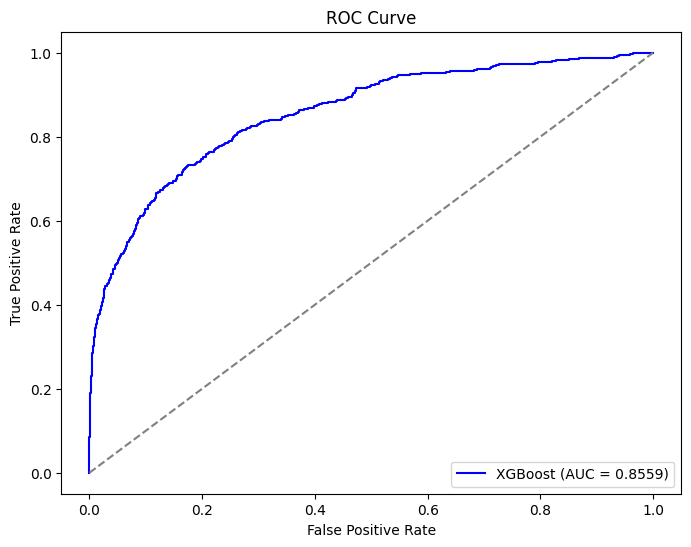

<Figure size 1000x600 with 0 Axes>

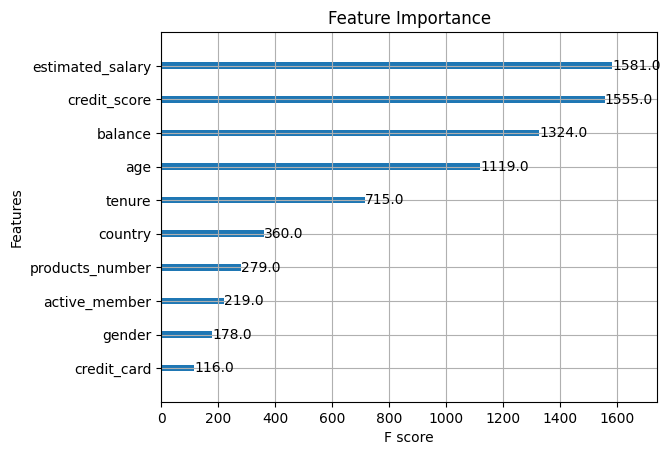

Best Threshold: 0.2833
Adjusted Accuracy: 0.8370
AUC Score: 0.8559
Classification Report:
               precision    recall  f1-score   support

           0     0.9113    0.8811    0.8959      2389
           1     0.5884    0.6645    0.6241       611

    accuracy                         0.8370      3000
   macro avg     0.7498    0.7728    0.7600      3000
weighted avg     0.8455    0.8370    0.8406      3000



In [30]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve

# 데이터 준비
y = df['churn']
X = df.drop(columns=['churn'])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# GridSearch에서 찾은 최적 하이퍼파라미터
best_params = {
    'colsample_bytree': 1.0,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'n_estimators': 200,
    'subsample': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'random_state': 42
}

# XGBoost 모델 학습
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# 예측 확률
y_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# AUC Score 계산
auc_score = roc_auc_score(y_test, y_probs)

# 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # F1 계산 (0 division 방지)
best_threshold = thresholds[np.argmax(f1_scores)]  # F1이 가장 높은 Threshold 선택
y_pred_optimal = (y_probs > best_threshold).astype(int)  # 최적 Threshold 적용

# 최적 Threshold 적용 후 평가
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
report_optimal = classification_report(y_test, y_pred_optimal, digits=4)

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'XGBoost (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance 시각화
plt.figure(figsize=(10, 6))
xgb.plot_importance(best_xgb_model, max_num_features=10)  # 상위 10개 변수 표시
plt.title("Feature Importance")
plt.show()

# 결과 출력
print(f'Best Threshold: {best_threshold:.4f}')
print(f'Adjusted Accuracy: {accuracy_optimal:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report_optimal)


### XGBOOST(OPTUNA사용)

✅ Adjusted Accuracy: 0.8590
🔥 Adjusted AUC Score: 0.8784
📊 Adjusted Classification Report:
              precision    recall  f1-score   support

           0     0.9069    0.9171    0.9120      2389
           1     0.6610    0.6318    0.6460       611

    accuracy                         0.8590      3000
   macro avg     0.7839    0.7744    0.7790      3000
weighted avg     0.8568    0.8590    0.8578      3000



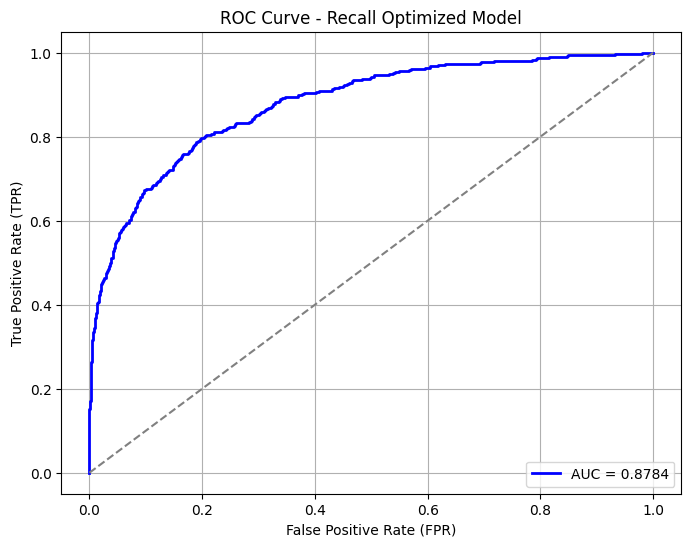

In [31]:
import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# 데이터 준비
y = df['churn']
X = df.drop(columns=['churn'])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 최적 Recall 하이퍼파라미터 설정
best_params = {
    'colsample_bytree': 0.998835926756326,
    'learning_rate': 0.05918736154295684,
    'max_depth': 4,
    'min_child_weight': 4,
    'n_estimators': 152,
    'subsample': 0.7171956369176462,
    'scale_pos_weight': 1.9,  # Recall 최적화된 비율
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'random_state': 42
}

# 모델 학습
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# 예측 확률값 (Positive Class의 확률)
y_probs = model.predict_proba(X_test)[:, 1]

# 최적 Threshold 설정 (Recall 중심)
best_threshold = 0.4933
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred_adjusted)
auc_score = roc_auc_score(y_test, y_probs)
report = classification_report(y_test, y_pred_adjusted, digits=4)

print(f"✅ Adjusted Accuracy: {accuracy:.4f}")
print(f"🔥 Adjusted AUC Score: {auc_score:.4f}")
print(f"📊 Adjusted Classification Report:\n{report}")

# ✅ AUC ROC 그래프 출력
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Recall Optimized Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


---

# LGB 사용

Training until validation scores don't improve for 10 rounds
[10]	valid's binary_logloss: 0.363612
[20]	valid's binary_logloss: 0.337697
[30]	valid's binary_logloss: 0.32777
[40]	valid's binary_logloss: 0.324757
[50]	valid's binary_logloss: 0.323227
[60]	valid's binary_logloss: 0.322389
[70]	valid's binary_logloss: 0.322251
Early stopping, best iteration is:
[67]	valid's binary_logloss: 0.321905
Accuracy: 0.8670
AUC Score: 0.8766
Classification Report:
               precision    recall  f1-score   support

           0     0.8806    0.9636    0.9202      2389
           1     0.7746    0.4894    0.5998       611

    accuracy                         0.8670      3000
   macro avg     0.8276    0.7265    0.7600      3000
weighted avg     0.8590    0.8670    0.8550      3000



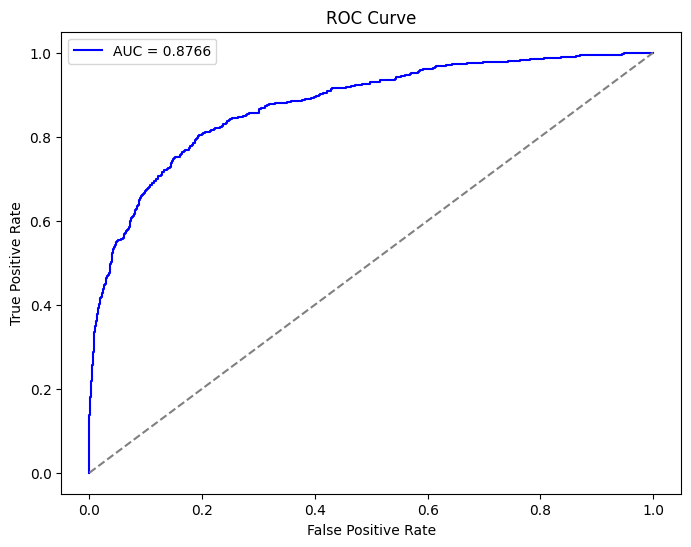

In [32]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y 분리
y = df['churn']  # 목표 변수
X = df.drop(columns=['churn'])  # 특징 변수

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM 데이터셋 생성
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)  # 검증 데이터 설정

# LightGBM 모델 학습
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'verbosity': -1
}

# callbacks을 사용하여 early stopping 적용
model = lgb.train(params, train_data, num_boost_round=100,
                  valid_sets=[valid_data], valid_names=['valid'],
                  callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)])

# 예측 확률값
y_pred_proba = model.predict(X_test)

# AUC 점수 계산
auc_score = roc_auc_score(y_test, y_pred_proba)

# 최적 임계값 적용 (기본값 0.5)
y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]

# 평가
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC-ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### LGB(gridsearch사용)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


c:\Users\Playdata\AppData\Local\anaconda3\envs\pystudy_env\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 20, 'num_leaves': 20, 'subsample': 0.7}
Accuracy: 0.8693
AUC Score: 0.8785
Classification Report:
               precision    recall  f1-score   support

           0     0.8775    0.9715    0.9221      2389
           1     0.8085    0.4697    0.5942       611

    accuracy                         0.8693      3000
   macro avg     0.8430    0.7206    0.7582      3000
weighted avg     0.8634    0.8693    0.8553      3000



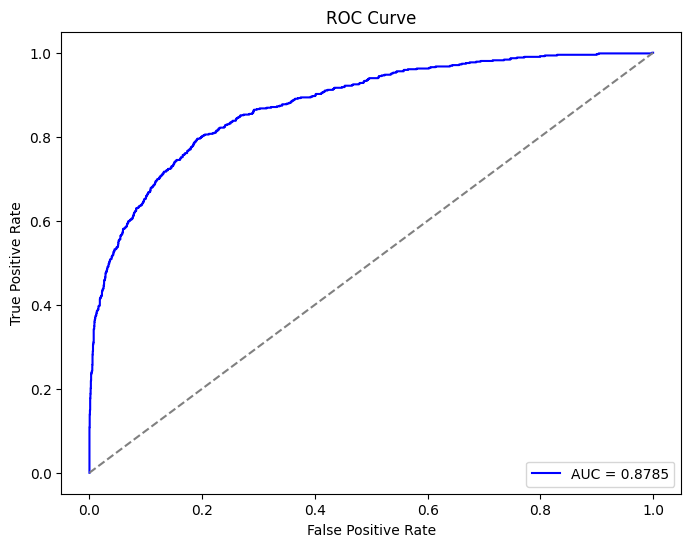

In [33]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y 분리
y = df['churn']  # 목표 변수
X = df.drop(columns=['churn'])  # 특징 변수

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM 모델 객체 생성
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', verbosity=-1)

# 하이퍼파라미터 검색 공간 정의
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search 수행
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-폴드 교차검증
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found:", grid_search.best_params_)

# 최적 하이퍼파라미터 적용하여 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # AUC를 위해 확률 예측값 사용

# 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### recall값 향상위해 Threshold 튜닝 및 Class Weight 조정

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Optimal Threshold: 0.4750
Accuracy: 0.7980
AUC Score: 0.8767
Classification Report:
               precision    recall  f1-score   support

           0     0.9407    0.7966    0.8626      2389
           1     0.5026    0.8036    0.6184       611

    accuracy                         0.7980      3000
   macro avg     0.7216    0.8001    0.7405      3000
weighted avg     0.8515    0.7980    0.8129      3000



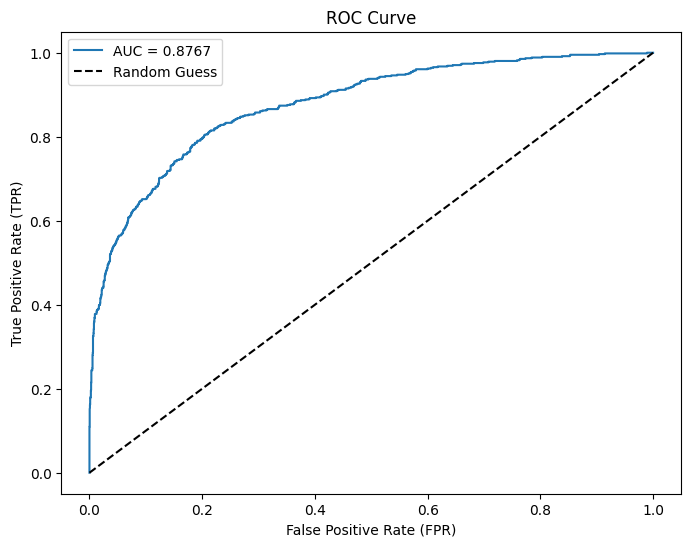

In [34]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# ✅ 데이터 준비
y = df['churn']
X = df.drop(columns=['churn'])

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ✅ LightGBM 모델 객체 생성 (Class Weight 적용)
model = lgb.LGBMClassifier(
    objective='binary', 
    metric='binary_logloss', 
    class_weight='balanced',  # 클래스 불균형 보정
    verbosity=-1
)

# ✅ 하이퍼파라미터 검색 공간 정의
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# ✅ Grid Search 수행
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC 기준으로 최적화
    cv=3,  
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ✅ 최적 하이퍼파라미터 적용하여 모델 재학습
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # 확률값 예측

# ✅ 최적 Threshold 찾기 (Precision-Recall 균형)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ 새로운 Threshold로 예측 변환
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# ✅ 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred, digits=4)

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# ✅ AUC 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_samples': 50, 'num_leaves': 20, 'subsample': 0.7}
Optimal Threshold: 0.1934
Accuracy: 0.8007
AUC Score: 0.8782
Classification Report:
               precision    recall  f1-score   support

           0     0.9427    0.7982    0.8645      2389
           1     0.5067    0.8101    0.6234       611

    accuracy                         0.8007      3000
   macro avg     0.7247    0.8042    0.7439      3000
weighted avg     0.8539    0.8007    0.8154      3000



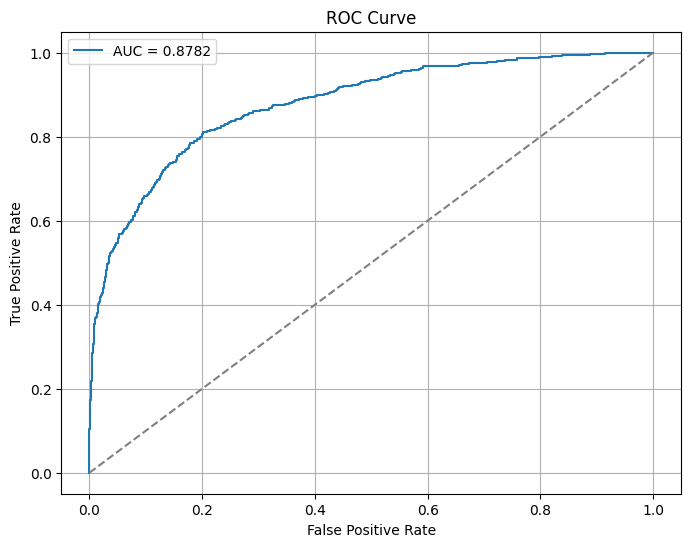

In [35]:
import pandas as pd
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# X, y 분리
y = df['churn']  # 목표 변수
X = df.drop(columns=['churn'])  # 특징 변수

# 학습 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# LightGBM 모델 객체 생성
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', verbosity=-1)

# 하이퍼파라미터 검색 공간 정의
param_grid = {
    'num_leaves': [20, 31, 50],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [10, 20, 50],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Grid Search 수행
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC 점수를 기준으로 최적화
    cv=3,  # 3-폴드 교차검증
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 적용하여 모델 재학습
best_model = grid_search.best_estimator_

# 예측 (확률 값)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 🔍 최적의 Threshold 찾기
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 최적 Threshold 기반으로 이진 예측
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# 평가
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred, digits=4)

# 결과 출력
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Optimal Threshold: {optimal_threshold:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print('Classification Report:\n', report)

# AUC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
